<a href="https://colab.research.google.com/github/divsal009/div/blob/master/SLBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import cv2
import numpy as np
import os, math

from matplotlib import pyplot as plt
   
      
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating SLBP
def slbp_calculated_pixel(img, x, y):
   
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
    slbp_val=0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
        slbp_val += val * math.atan(sum(val_ar)) + math.pi/2   # SLBP calculations  
    return slbp_val,val
   


In [40]:
path = '/content/Y2.jpg'
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_slbp = np.zeros((height, width),
                   np.uint8)
   


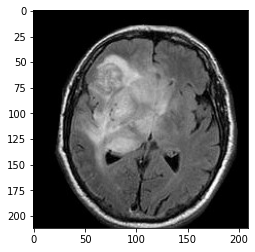

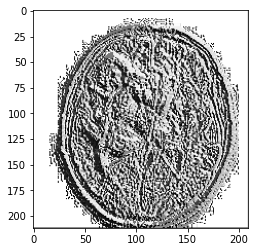

SLBP Program is finished


In [41]:
for i in range(0, height):
    for j in range(0, width):
        img_slbp[i,j],img_slbp[i,j] = slbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_slbp, cmap ="gray")
plt.show()
   
print("SLBP Program is finished")